In [98]:
# Import necessary packages
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import pandas as pd
from functools import reduce

In [99]:
#Viewed the directory where the working files are saved
os.getcwd()

'C:\\Users\\vangaasa'

In [100]:
#Created a BP share price DF from a Flat File 
ShareBP = pd.read_csv('Bp.csv',sep=',', error_bad_lines=False, index_col=False, dtype='unicode')
#Viewed he first few lines of the Flat File after importation
ShareBP.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,17/09/2021,308.5,309.549988,302.75,304.649994,291.244812,98600571
1,20/09/2021,301,306.149994,299.700012,303.700012,290.33667,50856932
2,21/09/2021,305.299988,313.299988,305.25,308.799988,295.212219,50626001
3,22/09/2021,313.25,319.700012,312.459015,316.75,302.812408,51097066
4,23/09/2021,318.399994,319.299988,312.350006,317.75,303.768402,31378887


In [101]:
#Rename BP closing price column to Close-BP to ease futher analysis
ShareBP.rename(columns={'Close': 'Close-BP', }, inplace=True)
#Viwed the DF after renaming.
ShareBP.head()

,Date,Open,High,Low,Close-BP,Adj Close,Volume
0,17/09/2021,308.5,309.549988,302.75,304.649994,291.244812,98600571
1,20/09/2021,301,306.149994,299.700012,303.700012,290.33667,50856932
2,21/09/2021,305.299988,313.299988,305.25,308.799988,295.212219,50626001
3,22/09/2021,313.25,319.700012,312.459015,316.75,302.812408,51097066
4,23/09/2021,318.399994,319.299988,312.350006,317.75,303.768402,31378887


In [102]:
#REview datatypes after renaming
ShareBP.dtypes

Date         object
Open         object
High         object
Low          object
Close-BP     object
Adj Close    object
Volume       object
dtype: object

In [103]:
#Setting the index (Date) as a Datetime datatype in the BP Workbook
ShareBP['Date'] = pd.to_datetime(ShareBP['Date'])
ShareBP

,Date,Open,High,Low,Close-BP,Adj Close,Volume
0,2021-09-17,308.5,309.549988,302.75,304.649994,291.244812,98600571
1,2021-09-20,301,306.149994,299.700012,303.700012,290.33667,50856932
2,2021-09-21,305.299988,313.299988,305.25,308.799988,295.212219,50626001
3,2021-09-22,313.25,319.700012,312.459015,316.75,302.812408,51097066
4,2021-09-23,318.399994,319.299988,312.350006,317.75,303.768402,31378887
...,...,...,...,...,...,...,...
247,2022-12-09,458.75,461.850006,454.75,457.850006,457.850006,38435954
248,2022-09-13,460.850006,466,456.350006,461.549988,461.549988,46399900
249,2022-09-14,457.450012,465.950012,454.200012,462.299988,462.299988,52690774
250,2022-09-15,462.5,466.799988,453.950012,456.549988,456.549988,44965722


In [104]:
#Reviwed  if there are missing values/null Values in the DF
ShareBP.isnull().sum()

Date         0
Open         5
High         5
Low          5
Close-BP     5
Adj Close    5
Volume       5
dtype: int64

In [105]:
#Dropping Duplicates in the DF 
ShareBP.drop_duplicates(keep=False,inplace=True)
ShareBP

,Date,Open,High,Low,Close-BP,Adj Close,Volume
0,2021-09-17,308.5,309.549988,302.75,304.649994,291.244812,98600571
1,2021-09-20,301,306.149994,299.700012,303.700012,290.33667,50856932
2,2021-09-21,305.299988,313.299988,305.25,308.799988,295.212219,50626001
3,2021-09-22,313.25,319.700012,312.459015,316.75,302.812408,51097066
4,2021-09-23,318.399994,319.299988,312.350006,317.75,303.768402,31378887
...,...,...,...,...,...,...,...
247,2022-12-09,458.75,461.850006,454.75,457.850006,457.850006,38435954
248,2022-09-13,460.850006,466,456.350006,461.549988,461.549988,46399900
249,2022-09-14,457.450012,465.950012,454.200012,462.299988,462.299988,52690774
250,2022-09-15,462.5,466.799988,453.950012,456.549988,456.549988,44965722


In [106]:
#Fill all missing /Null values in , with the next days value
ShareBP.fillna(method='ffill', inplace=True)

In [107]:
ShareBP.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close-BP     0
Adj Close    0
Volume       0
dtype: int64

In [108]:
ShareBP.head()

,Date,Open,High,Low,Close-BP,Adj Close,Volume
0,2021-09-17,308.5,309.549988,302.75,304.649994,291.244812,98600571
1,2021-09-20,301,306.149994,299.700012,303.700012,290.33667,50856932
2,2021-09-21,305.299988,313.299988,305.25,308.799988,295.212219,50626001
3,2021-09-22,313.25,319.700012,312.459015,316.75,302.812408,51097066
4,2021-09-23,318.399994,319.299988,312.350006,317.75,303.768402,31378887


In [109]:
#Import the data for Shell-
ShareShell = pd.read_csv('FP.csv',sep=',', error_bad_lines=False, index_col=False, dtype='unicode')
#rename the close price column to ensure further analysis is eased.#
ShareShell.rename(columns={'Close': 'Close-Shell', }, inplace=True)
ShareShell.set_index('Date')
ShareShell['Date'] = pd.to_datetime(ShareShell['Date'])
ShareShell.head()

,Date,Open,High,Low,Close-Shell,Adj Close,Volume
0,2021-09-17,1476.400024,1479.400024,1446.599976,1456,1401.227173,18491622
1,2021-09-20,1433.800049,1445,1422.400024,1436.800049,1382.74939,8109781
2,2021-09-21,1459.199951,1513.199951,1459.199951,1489,1432.985718,14254492
3,2021-09-22,1501.199951,1529.400024,1501.199951,1517.800049,1460.702393,14329333
4,2021-09-23,1525.800049,1528.199951,1507.199951,1523.800049,1466.476685,33298702


In [110]:
ShareShell.isnull().sum()

Date           0
Open           1
High           1
Low            1
Close-Shell    1
Adj Close      1
Volume         1
dtype: int64

In [111]:
#Fill all missing /Null values in , with the closest value next to it
ShareShell.fillna(method='ffill', inplace=True)
ShareShell.isnull().sum()

Date           0
Open           0
High           0
Low            0
Close-Shell    0
Adj Close      0
Volume         0
dtype: int64

In [112]:
ShareShell.rename(columns={'Close': 'Close-Shell', }, inplace=True)
ShareShell['Close-Shell'] = ShareShell['Close-Shell'].astype('float')
ShareShell['Close-Shell'].fillna(method='ffill', inplace=True)
ShareShell.head()

,Date,Open,High,Low,Close-Shell,Adj Close,Volume
0,2021-09-17,1476.400024,1479.400024,1446.599976,1456.000000,1401.227173,18491622
1,2021-09-20,1433.800049,1445,1422.400024,1436.800049,1382.74939,8109781
2,2021-09-21,1459.199951,1513.199951,1459.199951,1489.000000,1432.985718,14254492
3,2021-09-22,1501.199951,1529.400024,1501.199951,1517.800049,1460.702393,14329333
4,2021-09-23,1525.800049,1528.199951,1507.199951,1523.800049,1466.476685,33298702


In [113]:
ShareShell.isnull().sum()

Date           0
Open           0
High           0
Low            0
Close-Shell    0
Adj Close      0
Volume         0
dtype: int64

In [114]:
ShareShell.dtypes

Date           datetime64[ns]
Open                   object
High                   object
Low                    object
Close-Shell           float64
Adj Close              object
Volume                 object
dtype: object

In [115]:
#Change the closing price to float for graphs
ShareShell.set_index('Date')
ShareShell['Close-Shell'] = ShareShell['Close-Shell'].astype('float')
ShareShell

,Date,Open,High,Low,Close-Shell,Adj Close,Volume
0,2021-09-17,1476.400024,1479.400024,1446.599976,1456.000000,1401.227173,18491622
1,2021-09-20,1433.800049,1445,1422.400024,1436.800049,1382.74939,8109781
2,2021-09-21,1459.199951,1513.199951,1459.199951,1489.000000,1432.985718,14254492
3,2021-09-22,1501.199951,1529.400024,1501.199951,1517.800049,1460.702393,14329333
4,2021-09-23,1525.800049,1528.199951,1507.199951,1523.800049,1466.476685,33298702
...,...,...,...,...,...,...,...
247,2022-12-09,2329.5,2340.125977,2305,2321.500000,2321.5,28389401
248,2022-09-13,2318.5,2351.5,2307.5,2327.500000,2327.5,14142044
249,2022-09-14,2306,2354,2284.5,2341.000000,2341,18298486
250,2022-09-15,2340,2365.5,2307.600098,2314.500000,2314.5,13849101


In [116]:
#Import the price of oil 
Oil = pd.read_csv('Oil.csv',sep=',', error_bad_lines=False, index_col=False, dtype='unicode')
#Setting the index of the Oil DF to Date
Oil.set_index('Date')
Oil['Date'] = pd.to_datetime(Oil['Date'])
#Viewing the first five rows of the DF                          
Oil

,Date,Spot Price,Temp
0,2022-08-03,133.18,Hot
1,2022-08-06,129.2,Hot
2,2022-07-03,129.02,Hot
3,2022-09-06,128.47,Hot
4,2022-06-13,128.44,Hot
...,...,...,...
424,2021-01-18,54.21,Hot
425,2021-06-01,53.8,Hot
426,2021-07-01,53.7,Cold
427,2021-05-01,53.16,Cold


In [117]:
#Reviwed if there are any missing values
Oil.isnull().sum()

Date          0
Spot Price    0
Temp          0
dtype: int64

In [118]:
#Review the data types and change as required.
Oil.dtypes


Date          datetime64[ns]
Spot Price            object
Temp                  object
dtype: object

In [119]:
#Review the data types and change as required.
Oil['Spot Price'] = Oil['Spot Price'].astype('float')
#Filled the missing values 
Oil['Spot Price'].fillna(method='ffill', inplace=True)
Oil

,Date,Spot Price,Temp
0,2022-08-03,133.18,Hot
1,2022-08-06,129.20,Hot
2,2022-07-03,129.02,Hot
3,2022-09-06,128.47,Hot
4,2022-06-13,128.44,Hot
...,...,...,...
424,2021-01-18,54.21,Hot
425,2021-06-01,53.80,Hot
426,2021-07-01,53.70,Cold
427,2021-05-01,53.16,Cold


In [120]:
#To demonstrate the impact of weather on the oil price had atheoritical hot/cold data value was added to the Oil database.
Oil.groupby('Temp').mean()

,Spot Price
Temp,
Cold,79.741141
Hot,89.571429


Text(0.5, 1.0, 'Oil Price indiviudal DF')

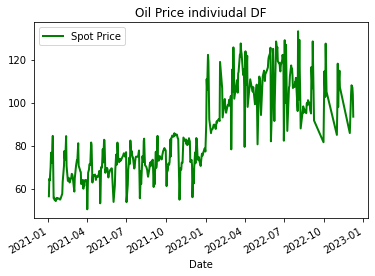

In [138]:
#Draw a graph to spot any missing values
Oil[['Date','Spot Price']].set_index('Date').plot(color="green", linewidth=2.0) 
plt.title('Oil Price indiviudal DF')

In [122]:
#Dropped Columns that are not required for this analysis
ShareBP.drop(labels=["Open","High","Low","Adj Close","Volume"],axis=1,inplace=True)
ShareShell.drop(labels=["Open","High","Low","Adj Close","Volume"],axis=1,inplace=True)
Oil.drop(labels=["Temp"],axis=1,inplace=True)
#Created a mergerd data_frames = [Oil, ShareBP, ShareFP]
df_merged = ShareBP.merge(ShareShell,how='left', left_on='Date', right_on='Date')
df_merged = df_merged.merge(Oil,how='left', left_on='Date', right_on='Date')
df_merged


,Date,Close-BP,Close-Shell,Spot Price
0,2021-09-17,304.649994,1456.000000,74.64
1,2021-09-20,303.700012,1436.800049,73.59
2,2021-09-21,308.799988,1489.000000,73.65
3,2021-09-22,316.75,1517.800049,75.50
4,2021-09-23,317.75,1523.800049,76.44
...,...,...,...,...
247,2022-12-09,457.850006,2321.500000,93.45
248,2022-09-13,461.549988,2327.500000,NaN
249,2022-09-14,462.299988,2341.000000,NaN
250,2022-09-15,456.549988,2314.500000,NaN


In [133]:
#Set index to date
df_merged.set_index('Date')
#Filled all the Null values with the previous rows values for the Spot Price column
df_merged

,Date,Close-BP,Close-Shell,Spot Price
0,2021-09-17,304.649994,1456.000000,74.64
1,2021-09-20,303.700012,1436.800049,73.59
2,2021-09-21,308.799988,1489.000000,73.65
3,2021-09-22,316.75,1517.800049,75.50
4,2021-09-23,317.75,1523.800049,76.44
...,...,...,...,...
247,2022-12-09,457.850006,2321.500000,93.45
248,2022-09-13,461.549988,2327.500000,93.45
249,2022-09-14,462.299988,2341.000000,93.45
250,2022-09-15,456.549988,2314.500000,93.45


In [134]:
#Review the datatypes
df_merged.dtypes

Date           datetime64[ns]
Close-BP               object
Close-Shell           float64
Spot Price            float64
dtype: object

In [136]:
#Ensure no 0 values are present
df_merged.isnull().sum()

Date           0
Close-BP       0
Close-Shell    0
Spot Price     0
dtype: int64

In [130]:
#Create a df naming convention (Easier to use than df_Merged)
df=df_merged
df_merged.dropna(how='all',inplace=True)
df['Spot Price'].fillna(method='ffill', inplace=True)

In [132]:
#Set index to date on the DF
df.set_index('Date')

,Close-BP,Close-Shell,Spot Price
Date,,,
2021-09-17,304.649994,1456.000000,74.64
2021-09-20,303.700012,1436.800049,73.59
2021-09-21,308.799988,1489.000000,73.65
2021-09-22,316.75,1517.800049,75.50
2021-09-23,317.75,1523.800049,76.44
...,...,...,...
2022-12-09,457.850006,2321.500000,93.45
2022-09-13,461.549988,2327.500000,93.45
2022-09-14,462.299988,2341.000000,93.45


In [142]:
df
df.dtypes

Date           datetime64[ns]
Close-BP               object
Close-Shell           float64
Spot Price            float64
dtype: object

In [147]:
#Renamed all closing prices to flaot
df['Close-BP'] = df['Close-BP'].astype('float')
df.dtypes

Date           datetime64[ns]
Close-BP              float64
Close-Shell           float64
Spot Price            float64
dtype: object

In [150]:
#Dropp Dates to ensure all 3 graphs have the same date paramaters
mod_df = df.dropna( axis=0, 
                    how='any')

Text(0.5, 1.0, 'Oil Closing price-Combined DF')

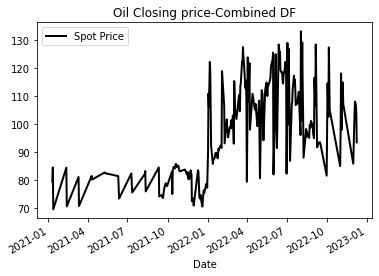

In [151]:
#Plot Oil price over time
mod_df[['Date','Spot Price']].set_index('Date').plot(color="black", linewidth=2.0)  
plt.title('Oil Closing price-Combined DF')

Text(0.5, 1.0, 'Shell Closing price-Combined DF')

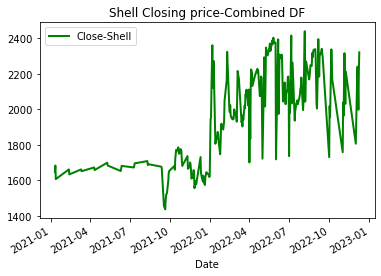

In [152]:
#Plot Shell price over time
mod_df [['Date','Close-Shell']].set_index('Date').plot(color="green", linewidth=2.0) 
plt.title('Shell Closing price-Combined DF')

Text(0.5, 1.0, 'BP Closing price-Combined DF')

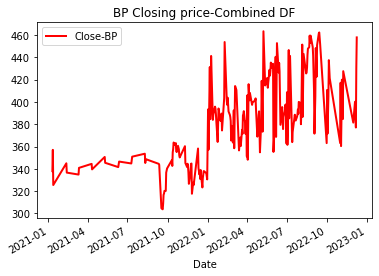

In [153]:
#Plot BP price over time
mod_df[['Date','Close-BP']].set_index('Date').plot(color="red", linewidth=2.0) 
plt.title('BP Closing price-Combined DF')

In [76]:
#Analysis of DB
mod_df.describe()

,Close-BP,Close-Shell,Spot Price
count,248.000000,248.000000,248.000000
mean,381.993951,1971.273789,98.169677
std,36.292786,255.153755,16.211867
min,303.700012,1436.800049,69.530000
25%,354.487488,1716.949951,83.422500
50%,382.849991,2005.000000,98.495000
75%,404.499992,2177.500000,111.660000
max,463.350006,2440.000000,133.180000


In [155]:
#Filter on a specific criteria-select rows between two data prices for Oil
mod_df.loc[(mod_df['Spot Price']>=60) &  (mod_df['Spot Price']<=70)]

,Date,Close-BP,Close-Shell,Spot Price
53,2021-01-12,325.450012,1607.0,69.53


In [156]:
#Covert a specific value to Yen'000
def YenVal(a):
    return (a) *1.12*1000
Yen = YenVal(336.600006)
Yen

376992.00672000006

In [157]:
mod_df.dtypes

Date           datetime64[ns]
Close-BP              float64
Close-Shell           float64
Spot Price            float64
dtype: object

In [158]:
#One can now conclude the same date paramaters are used for both 3 these sets
#There is one additional problem the share prices are not comparable-for ease of analysis we will baseline the price of Close-Shell
mod_df['RatioRebasedShell'] = mod_df['Close-Shell'] / 1456.00*100
mod_df['RatioRebasedBP'] = mod_df['Close-BP'] / 304.64994*100
mod_df['RatioRebasedBPd'] = mod_df['RatioRebasedBP']-mod_df['Spot Price']
mod_df['RatioRebasedShelld'] = mod_df['RatioRebasedShell']-mod_df['Spot Price']


In [159]:
#Ananalysing if new column values are reflecting
mod_df.head()


,Date,Close-BP,Close-Shell,Spot Price,RatioRebasedShell,RatioRebasedBP,RatioRebasedBPd,RatioRebasedShelld
0,2021-09-17,304.649994,1456.000000,74.64,100.000000,100.000018,25.360018,25.360000
1,2021-09-20,303.700012,1436.800049,73.59,98.681322,99.688190,26.098190,25.091322
2,2021-09-21,308.799988,1489.000000,73.65,102.266484,101.362235,27.712235,28.616484
3,2021-09-22,316.750000,1517.800049,75.50,104.244509,103.971791,28.471791,28.744509
4,2021-09-23,317.750000,1523.800049,76.44,104.656597,104.300037,27.860037,28.216597


In [162]:
#Reviewing if rebased values (RatioRebasedBPd,RatioRebasedShelld) are comparable
mod_df.describe()

,Close-BP,Close-Shell,Spot Price,RatioRebasedShell,RatioRebasedBP,RatioRebasedBPd,RatioRebasedShelld
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,383.202182,1976.807141,98.094762,135.769721,125.784427,27.689665,37.674959
std,37.246721,256.858159,16.093027,17.641357,12.226072,13.486731,11.365881
min,303.700012,1436.800049,69.530000,98.681322,99.688190,-10.359218,2.060331
25%,354.912506,1720.299988,83.505000,118.152472,116.498466,19.075559,30.996622
50%,383.099991,2011.750000,98.120000,138.169643,125.750883,30.000377,37.068901
75%,406.424996,2182.000000,111.075000,149.862637,133.407213,35.623291,43.085234
max,463.350006,2440.000000,133.180000,167.582418,152.092597,58.297933,68.595824


Text(0.5, 1.0, 'Correlation between Oil Price and Shell and BP Share price')

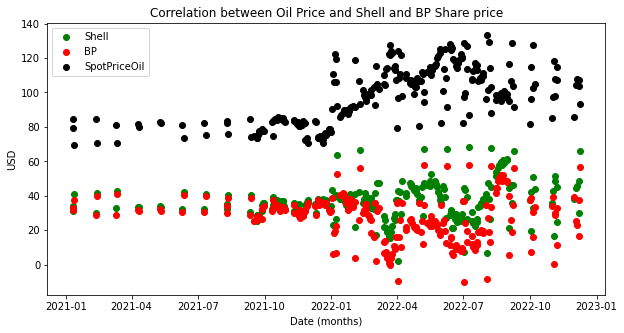

In [85]:
#Plotting Oil and the Rebased Closing values of BP and Shell over a date series
plt.subplots(figsize=(10,5))

plt.scatter(mod_df['Date'],mod_df['RatioRebasedShelld'],color='green',label="Shell")
plt.scatter(mod_df['Date'],mod_df['RatioRebasedBPd'],color='red',label="BP")
plt.scatter(mod_df['Date'],mod_df['Spot Price'],color='black',label="SpotPriceOil")
plt.legend(loc='upper left')

plt.xlabel('Date (months)')
plt.ylabel('USD')
plt.title('Correlation between Oil Price and Shell and BP Share price')

<AxesSubplot:xlabel='RatioRebasedBP', ylabel='RatioRebasedShelld'>

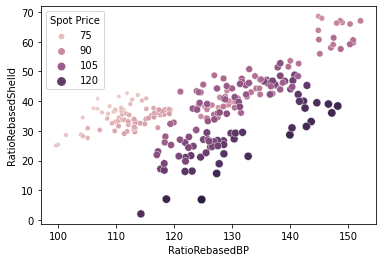

In [87]:
#Creating a scatter plot for reference purposes only
sns.scatterplot(x='RatioRebasedBP',y='RatioRebasedShelld', data=mod_df, hue='Spot Price', size='Spot Price')

Text(0.5, 1.0, 'Analaysis: Relationship between Shell and BP Share price')

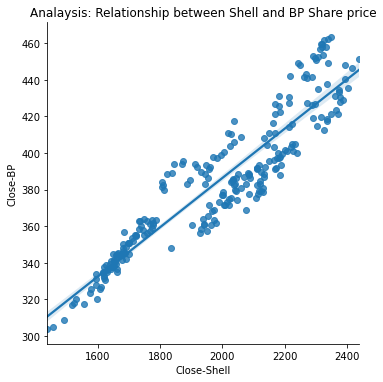

In [165]:
#Linear regressing between BP and Shells closing price
sns.lmplot(x='Close-Shell',y='Close-BP',data=mod_df)
plt.xlabel('Close-Shell')
plt.ylabel('Close-BP')
plt.title('Analaysis: Relationship between Shell and BP Share price')

Text(0.5, 1.0, 'Analaysis: Relationship between Shell Share price and the spot price of Oil')

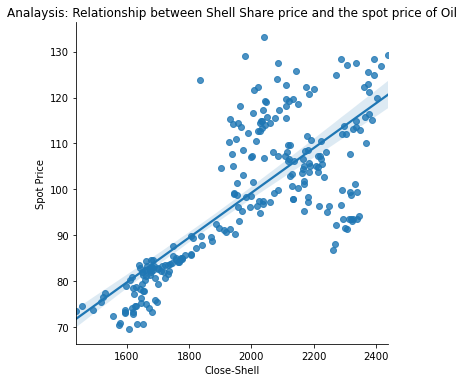

In [167]:
#Linear regressing between Oil and Shell's closing price
sns.lmplot(x='Close-Shell',y='Spot Price',data=mod_df)
plt.xlabel('Close-Shell')
plt.ylabel('Spot Price')
plt.title('Analaysis: Relationship between Shell Share price and the spot price of Oil')

Text(0.5, 1.0, 'Analaysis: Relationship between BP Share price and the spot price of Oil')

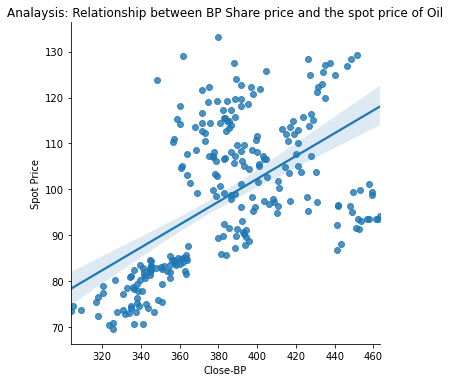

In [166]:
#Linear regressing between OIl and BP's closing price
sns.lmplot(x='Close-BP',y='Spot Price',data=mod_df)
plt.xlabel('Close-BP')
plt.ylabel('Spot Price')
plt.title('Analaysis: Relationship between BP Share price and the spot price of Oil')

In [174]:
# Import libraries
import json
import requests
  
# defining key/request url
key = "https://api.binance.com/api/v3/ticker/price?symbol=BTCUSDT"
  
# requesting data from url
data = requests.get(key)  
data = data.json()
print(f"{data['symbol']} price is {data['price']}")

BTCUSDT price is 18682.70000000
